In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm,t,ttest_1samp,ttest_ind, chisquare, chi2_contingency,f_oneway
import math


In [35]:
df=pd.read_csv('walmart_data.csv')
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
"""There are no missing values in the dataset."""

In [73]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [17]:
df.Gender.count()  # total purchases made at walmart

550068

In [18]:
df.Gender.value_counts()  # to calculate how many of them are males and female purchaser

M    414259
F    135809
Name: Gender, dtype: int64

In [76]:
df['User_ID'].nunique() # to find Unique customers to the walmart

5891

In [79]:
df['Product_ID'].nunique() # total number of products holded by Walmart that 'sold'

3631

In [80]:
df.Age.value_counts() # find total catogories of the Age groups

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [84]:
df.groupby('Gender')['Age'].value_counts()

Gender  Age  
F       26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
M       26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: Age, dtype: int64

In [90]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)*100

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Occupation                 0      12.659889
                           1       8.621843
                           2       4.833584
                           3       3.208694
                           4      13.145284
                           5       2.213726
                           6       3.700452
                           7      10.750125
                           8       0.281056
                           9       1.143677
                           10      2.350618
                           11      2.106285
                           12      5.668208
                           13      1.404917
                           14      4.964659
                           15      2.211545
                           16      4.612339
                           17      7.279645
                           18      1.203851
                           19      1.538173
                           20      6.101427
Product_Category           1      25.520118
                           2       4.338373
                           3       3.674637
                           4       2.136645
                           5      27.438971
                           6       3.720631
                           7       0.676462
                           8      20.711076
                           9       0.074536
                           10      0.931703
                           11      4.415272
                           12      0.717548
                           13      1.008784
                           14      0.276875
                           15      1.143495
                           16      1.786688
                           17      0.105078
                           18      0.568112
                           19      0.291419
                           20      0.463579
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

# Observations
80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
75% of the users are Male and 25% are Female
60% Single, 40% Married
35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
Total of 20 product categories are there
major product share are in catagory 1,5 and 8 contributing 72%
There are 20 differnent types of occupations in the city 

In [20]:
df.Gender.value_counts(normalize=True)  # find what persent of buyers are male and female

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [ ]:
"""75% buyers are Male, only 24% female buys from the store"""
""" should focus more on the Female buyers to improve number"""

In [22]:
df.groupby('Gender')['User_ID'].nunique() #to find unique  buyers

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

# """ to find the Repeted customers who buy regularly from store- Males are dominant than female"""
""" A Unique male customer purchase 1.2 times more than a unique female customer,
thus we can say that buying frequency of male is more than female """

In [107]:
# Tracking the amount spent per transaction of all the 50 million female customers,and all the 50 million male customers,
#calculate the average, and conclude the results.


In [106]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
""" a avg Female purchases 8734 worth of product, while male purchase on an average of 9437"""

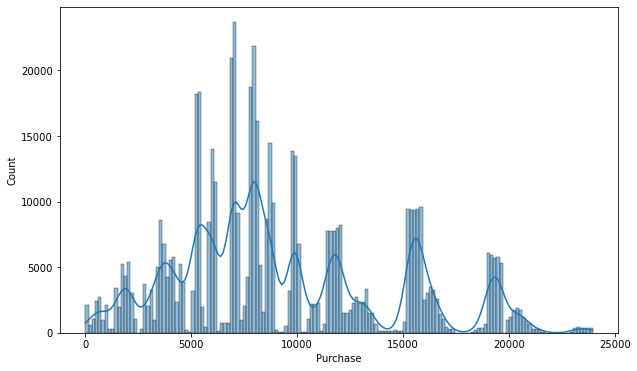

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, 
             x='Purchase',
             kde=True)
plt.show()

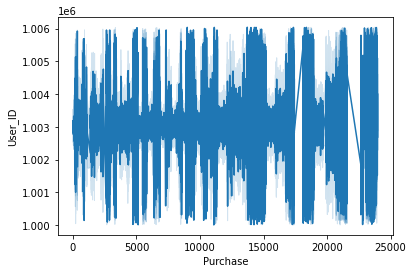

In [37]:
sns.lineplot(data=df,
            y="User_ID",
            x="Purchase")
plt.show()

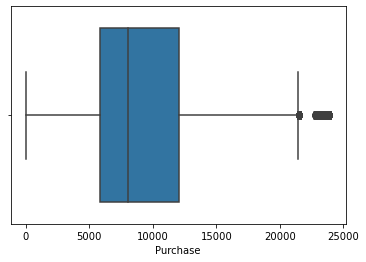

In [92]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

In [ ]:
"""data has outliers"""

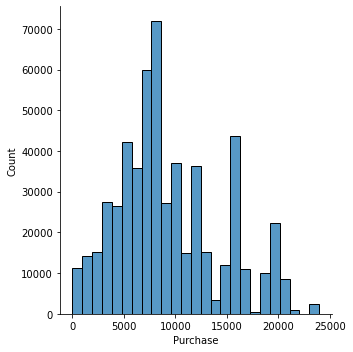

In [67]:
sns.displot(data=df,
            x='Purchase',
            bins=25)

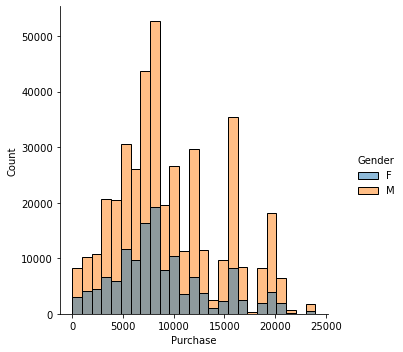

In [38]:
sns.displot(x='Purchase',
           hue='Gender',
           data=df,
           bins=25)

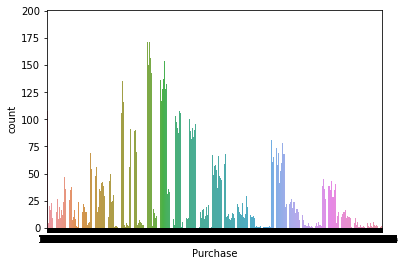

In [40]:
sns.countplot(data=df,
            x="Purchase")
plt.show()

In [ ]:
"""data is not normal distributed, its a right scewed data distribution"""

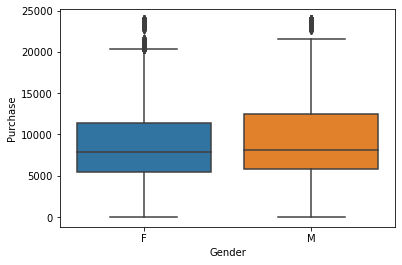

In [42]:
sns.boxplot(data=df,
          x="Gender",
          y="Purchase")
plt.show()

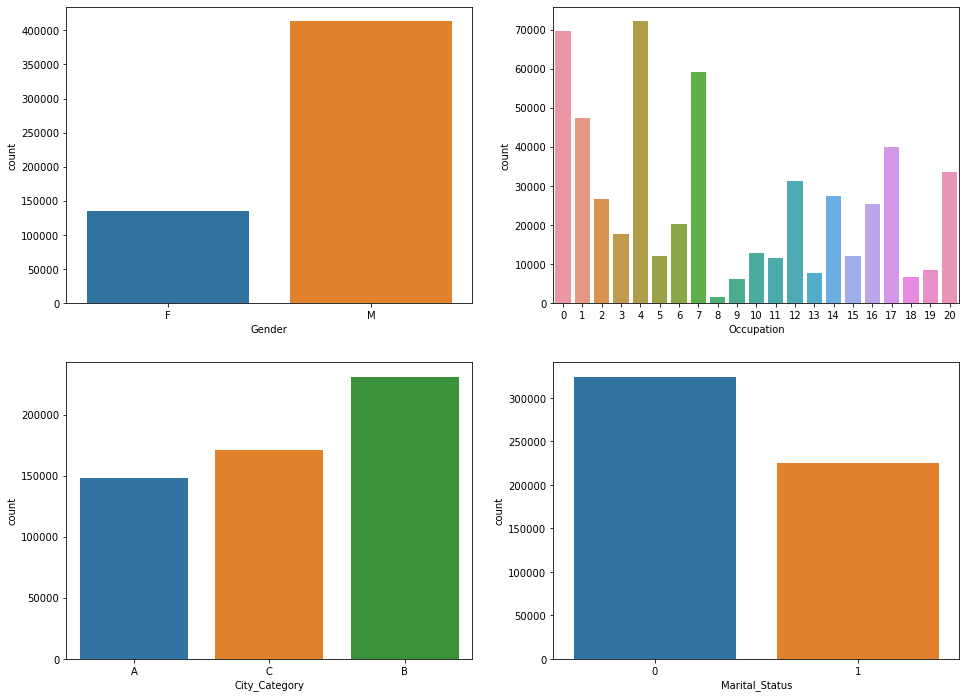

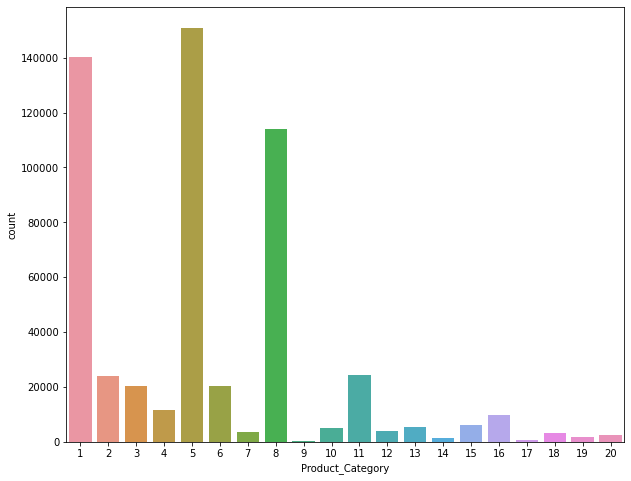

In [93]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

# Observations
Most of the users are Male
There are 20 different types of Occupation and Product_Category
More users belong to B City_Category
More users are Single as compare to Married
Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

# Gender Vs purchase

In [ ]:
#Use the Central limit theorem to compute the interval. 
#Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

In [46]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [44]:
df.sample(300).groupby('Gender')['Purchase'].describe()  # testing with sample of 300-

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,84.0,7845.726190,4361.302907,391.0,5236.00,7780.0,9035.25,20665.0
M,216.0,9438.351852,4624.609715,568.0,6154.25,8671.0,11946.00,23116.0


In [45]:
df.sample(300).groupby('Gender')['Purchase'].describe() # testing with sample 300- 

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,71.0,8876.211268,5157.570386,130.0,5408.5,8050.0,11493.5,19991.0
M,229.0,9546.689956,5189.816496,14.0,5866.0,8001.0,13277.0,23930.0


In [ ]:
# CLT

# To find Male purchase Behaviour

In [51]:
sample_size=300
iteration=1000

In [124]:
df_m=df[df.Gender=='M']
df_m.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [125]:
df_m=df[df.Gender=='M']
male_spend=[]
for iter in range(iteration):
    male_spend.append(
        df_m.sample(sample_size)['Purchase'].mean()
    )
#df_filtered.head()
male_spend

[9395.67,
 9659.826666666666,
 9267.66,
 9484.133333333333,
 9488.206666666667,
 9276.223333333333,
 9777.99,
 9215.07,
 10116.743333333334,
 9778.753333333334,
 9508.78,
 9340.866666666667,
 8980.953333333333,
 9365.106666666667,
 9259.096666666666,
 9684.68,
 9263.573333333334,
 9320.906666666666,
 9556.43,
 9480.19,
 9590.413333333334,
 9537.256666666666,
 9408.49,
 9643.696666666667,
 9334.456666666667,
 9412.036666666667,
 9118.143333333333,
 9278.626666666667,
 9387.043333333333,
 9006.496666666666,
 9740.303333333333,
 9888.316666666668,
 10208.913333333334,
 9207.486666666666,
 9800.126666666667,
 9610.876666666667,
 9010.43,
 9800.633333333333,
 9432.44,
 9510.82,
 9135.196666666667,
 9686.206666666667,
 9524.336666666666,
 8801.766666666666,
 9124.346666666666,
 9219.75,
 9277.896666666667,
 9384.743333333334,
 9971.37,
 9460.106666666667,
 9287.393333333333,
 9528.13,
 8976.613333333333,
 9174.43,
 9805.453333333333,
 8898.346666666666,
 9163.853333333333,
 9372.126666666667

In [127]:
m_sample_mean=np.mean(male_spend)
m_sample_mean

9442.272633333332

In [ ]:
""" the mean value of male purchases is very close to the sample mean of the samples taken"""

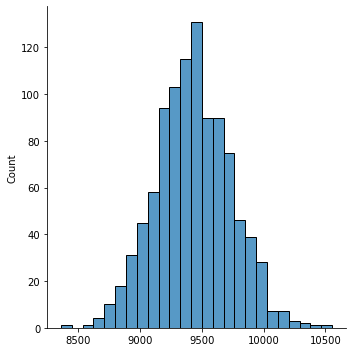

In [61]:
sns.displot(x=male_spend,
           bins=25)

In [ ]:
"""its a normal distribution with mean 9433.11814"""
"""population purchase mean(9437) and sample purchase mean(9442) are tends to equal"""

# to find female purchase behaviour

In [ ]:
sample_size=300
iteration=1000

In [128]:
df_f=df[df.Gender=='F']
#df_f.head()
female_spend=[]
for iter in range(iteration):
    female_spend.append(
    df_f.sample(sample_size)['Purchase'].mean())
    
female_spend    

[8838.813333333334,
 8975.003333333334,
 8152.75,
 8684.76,
 8699.73,
 9049.96,
 9195.66,
 8245.256666666666,
 9284.306666666667,
 8670.196666666667,
 9412.286666666667,
 8434.75,
 8332.06,
 8934.28,
 8509.38,
 9061.84,
 9150.756666666666,
 8577.35,
 8691.64,
 8342.513333333334,
 8758.603333333333,
 8643.356666666667,
 8965.766666666666,
 9000.873333333333,
 9461.056666666667,
 9252.736666666666,
 9029.27,
 8615.89,
 8898.456666666667,
 9212.243333333334,
 8643.94,
 8907.46,
 8436.273333333333,
 8957.273333333333,
 8375.073333333334,
 8867.23,
 8190.153333333334,
 8460.936666666666,
 8531.676666666666,
 8413.233333333334,
 8642.053333333333,
 8812.043333333333,
 8876.256666666666,
 8500.05,
 8957.536666666667,
 9051.573333333334,
 9047.836666666666,
 8547.58,
 8775.123333333333,
 8605.076666666666,
 8615.633333333333,
 8808.796666666667,
 8516.113333333333,
 9412.97,
 8482.4,
 9034.013333333334,
 8359.003333333334,
 8728.49,
 8509.67,
 8931.596666666666,
 8913.1,
 8887.716666666667,
 8

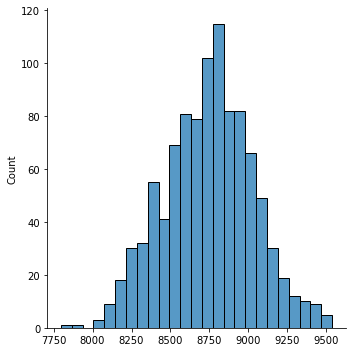

In [71]:
sns.displot(x=female_spend,
           bins=25)

In [129]:
f_sample_mean=np.mean(female_spend)
f_sample_mean

8738.640206666667

In [ ]:
"""its a normal distribution with mean 8744.12"""
"""population purchase mean(8734) and sample purchase mean(8738) are tends to equal"""

In [133]:
# consider 95% confidence

male_margin_of_error_clt = 1.96*df_m['Purchase'].std()/np.sqrt(len(df_m))
male_sample_mean = df_m['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt
print("Male clt lower lim:", male_lower_lim)
print("Male clt upper lim:", male_upper_lim)  

Male clt lower lim: 9422.019162420047
Male clt upper lim: 9453.032918524483


In [135]:
female_margin_of_error_clt = 1.96*df_f['Purchase'].std()/np.sqrt(len(df_f))
female_sample_mean = df_f['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt
print("Female lower clt lim :", female_lower_lim)
print("Female upeer clt lim :", female_upper_lim) 

Female lower clt lim : 8709.211081242413
Female upeer clt lim : 8759.920449068539


# Observation

(using 300 sample) with the help of Central Limit Theorem for the population we can say that:

Average amount spend by male customers is 9442.27
Average amount spend by female customers is 8738.64

and we can infer about the population with 95% confidence that:

Average amount spend by male customer will lie in between: (9422.01, 9453.03)
Average amount spend by female customer will lie in between: (8709.21, 8759.92)

# married vs unmarried purchase

In [136]:
df_married=df[df.Marital_Status==True]
df_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


In [137]:
df_unmarried=df[df.Marital_Status==False]
df_unmarried.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [139]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


# observation:
#"""Population mean for married people purchase is 9261.17"""
#"""Population mean for unmarried people purchase is 9265.90 """
#we can say that there is no much diffrence in there purchase behaviour although the number of unmarried people are more


In [142]:
sample_size=300
Iteration=1000

married_spend=[]
for iter in range(iteration):
    married_spend.append(
        df_married.sample(sample_size)['Purchase'].mean()
    )
married_spend

[9215.356666666667,
 9644.93,
 8705.513333333334,
 9049.203333333333,
 9699.656666666666,
 9170.283333333333,
 9347.276666666667,
 8947.03,
 9467.896666666667,
 8837.87,
 9313.79,
 9448.04,
 9960.253333333334,
 9133.76,
 9471.893333333333,
 8803.033333333333,
 8845.763333333334,
 9336.123333333333,
 9109.59,
 9572.033333333333,
 9102.076666666666,
 8760.686666666666,
 9433.626666666667,
 9682.053333333333,
 8971.35,
 8501.946666666667,
 9292.36,
 9528.24,
 9004.2,
 9237.123333333333,
 9390.336666666666,
 9543.276666666667,
 9298.58,
 8468.056666666667,
 9028.5,
 9389.73,
 9330.136666666667,
 9551.383333333333,
 9486.033333333333,
 9216.476666666667,
 9205.656666666666,
 9301.466666666667,
 9239.573333333334,
 9482.923333333334,
 9169.66,
 9175.53,
 9768.936666666666,
 9213.376666666667,
 9479.006666666666,
 8981.696666666667,
 9061.346666666666,
 8771.01,
 9169.133333333333,
 9223.576666666666,
 9264.69,
 9307.923333333334,
 9351.643333333333,
 9131.94,
 8919.436666666666,
 9368.166666

In [145]:
avg_mean_of_sample_married=np.mean(married_spend)
avg_mean_of_sample_married

9259.072163333332

In [ ]:
""" population mean of married people= 9261.17 """
""" sample mean of married people=     9259.07"""

In [147]:
# taking 95% confidence for married purchasers

married_margin_of_error_clt = 1.96*df_married['Purchase'].std()/np.sqrt(len(df_married))
sample_mean = df_married['Purchase'].mean()
lower_lim = sample_mean - married_margin_of_error_clt
upper_lim = sample_mean + married_margin_of_error_clt
print("married sample mean :", sample_mean)
print("married lower clt lim :", lower_lim)
print("married upeer clt lim :", upper_lim) 

married sample mean : 9261.174574082374
married lower clt lim : 9240.460046422771
married upeer clt lim : 9281.889101741976


In [148]:
# taking 95% confidence for unmarried purchasers

unmarried_margin_of_error_clt = 1.96*df_unmarried['Purchase'].std()/np.sqrt(len(df_unmarried))
sample_mean_unmarried = df_unmarried['Purchase'].mean()
lower_lim = sample_mean_unmarried - unmarried_margin_of_error_clt
upper_lim = sample_mean_unmarried + unmarried_margin_of_error_clt
print("unmarried sample mean :", sample_mean_unmarried)
print("unmarried lower clt lim :", lower_lim)
print("unmarried upeer clt lim :", upper_lim)

unmarried sample mean : 9265.907618921507
unmarried lower clt lim : 9248.61610045097
unmarried upeer clt lim : 9283.199137392043


# Observation:-

(using 300 sample) with the help of Central Limit Theorem for the population we can say that:

Average amount spend by married customers is 9261.17
Average amount spend by unmarried customers is 9265.90

and we can infer about the population with 95% confidence that:

Average amount spend by married customer will lie in between: (9240.46, 9281.88)
Average amount spend by unmarried customer will lie in between: (9248.61, 9283.19)

# Age vs Purchase

In [153]:
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()  # age hai sum karo group wise 
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [154]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [157]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
""" pop mean for each age group is available from this data"""

In [158]:
df.Age.value_counts(normalize=True) 

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [160]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)      
all_means        

{'26-35': [1031483.26,
  1039933.34,
  830578.215,
  962892.4,
  1001824.68,
  1015809.045,
  1116733.105,
  818918.69,
  947980.705,
  997581.6,
  996298.065,
  1138624.195,
  1104518.205,
  1001375.545,
  1099551.905,
  957196.95,
  943305.11,
  1111227.605,
  807137.115,
  929581.85,
  981952.61,
  985189.665,
  964623.89,
  968776.42,
  982180.57,
  923720.07,
  945760.45,
  984138.09,
  986073.075,
  1115455.125,
  1008308.13,
  933285.34,
  924093.865,
  1106676.53,
  980594.255,
  1050951.765,
  1140917.85,
  1039779.505,
  1097162.85,
  979410.02,
  959060.04,
  940023.415,
  973281.425,
  984964.385,
  1010378.5,
  986965.75,
  1107197.035,
  1029073.81,
  973196.3,
  1006110.745,
  890515.405,
  940843.64,
  990200.53,
  1067911.49,
  945587.96,
  997918.035,
  892690.01,
  877533.89,
  1033843.47,
  1035340.045,
  990384.285,
  995730.555,
  899798.96,
  1012398.28,
  1147016.64,
  1146658.88,
  1034414.115,
  995663.415,
  862341.845,
  1090383.88,
  966277.25,
  911605.44,

In [161]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


# Recommendations
1)Men spent more money than women, So company should focus on retaining the male customers.
2)A Unique male customer purchase 1.2 times more than a unique female customer,thus we can say that buying frequency of male is more than female. Company should also focus on acquiring new female customers.
3)Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
4)Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
5)Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
6)Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.